In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [85]:
seDF = pd.read_csv('../data/Sleep_Efficiency.csv', parse_dates=['Bedtime', 'Wakeup time'])
seDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   ID                      452 non-null    int64         
 1   Age                     452 non-null    int64         
 2   Gender                  452 non-null    object        
 3   Bedtime                 452 non-null    datetime64[ns]
 4   Wakeup time             452 non-null    datetime64[ns]
 5   Sleep duration          452 non-null    float64       
 6   Sleep efficiency        452 non-null    float64       
 7   REM sleep percentage    452 non-null    int64         
 8   Deep sleep percentage   452 non-null    int64         
 9   Light sleep percentage  452 non-null    int64         
 10  Awakenings              432 non-null    float64       
 11  Caffeine consumption    427 non-null    float64       
 12  Alcohol consumption     438 non-null    float64   

In [86]:
low_eff_df = seDF[seDF['Deep sleep percentage']-seDF['Light sleep percentage'] < 10]
high_eff_df = seDF[seDF['Deep sleep percentage']-seDF['Light sleep percentage'] > 10]

In [87]:
low_eff_df[['Deep sleep percentage', 'Light sleep percentage', 'Sleep efficiency']].describe()

,Deep sleep percentage,Light sleep percentage,Sleep efficiency
count,113.000000,113.000000,113.000000
mean,27.415929,50.283186,0.590885
std,5.902066,4.063050,0.062529
min,18.000000,40.000000,0.500000
25%,22.000000,47.000000,0.530000
50%,25.000000,51.000000,0.600000
75%,35.000000,53.000000,0.650000
max,40.000000,63.000000,0.690000


In [88]:
high_eff_df[['Deep sleep percentage', 'Light sleep percentage', 'Sleep efficiency']].describe()

,Deep sleep percentage,Light sleep percentage,Sleep efficiency
count,339.000000,339.000000,339.000000
mean,61.292035,15.988201,0.854926
std,5.262373,3.540114,0.075012
min,51.000000,7.000000,0.700000
25%,57.000000,13.000000,0.800000
50%,60.000000,17.000000,0.870000
75%,65.000000,18.500000,0.920000
max,75.000000,30.000000,0.990000


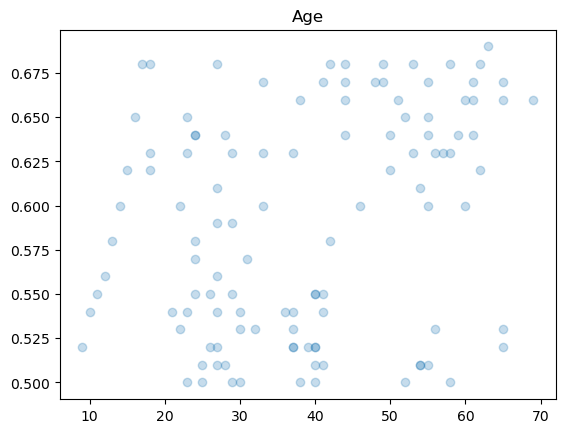

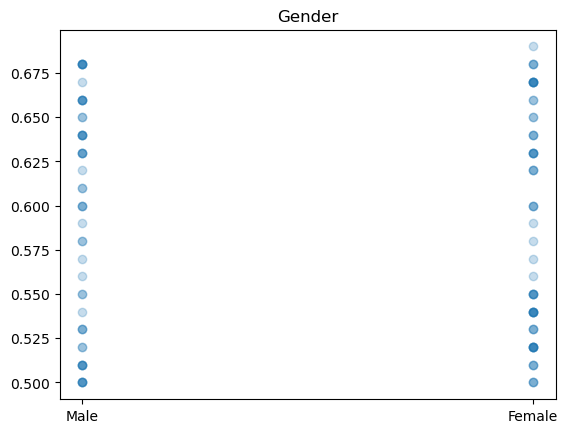

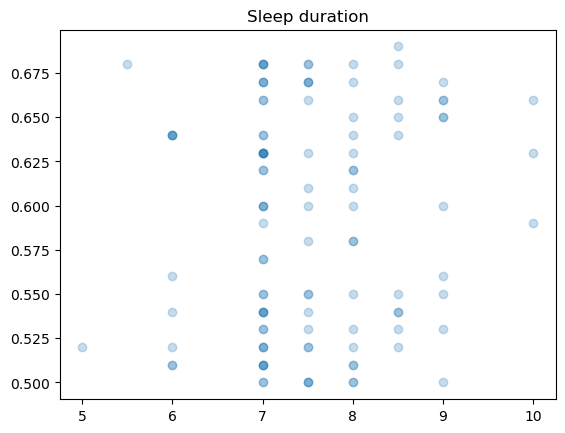

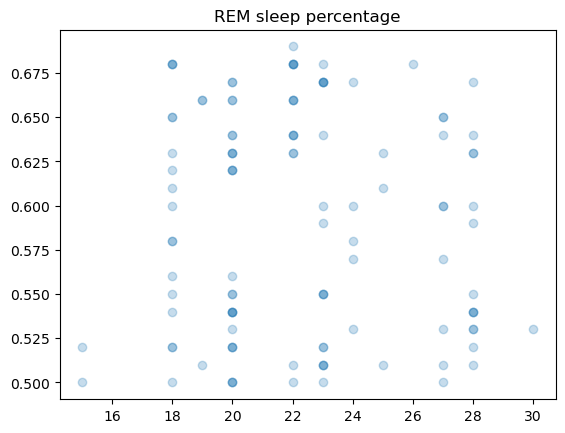

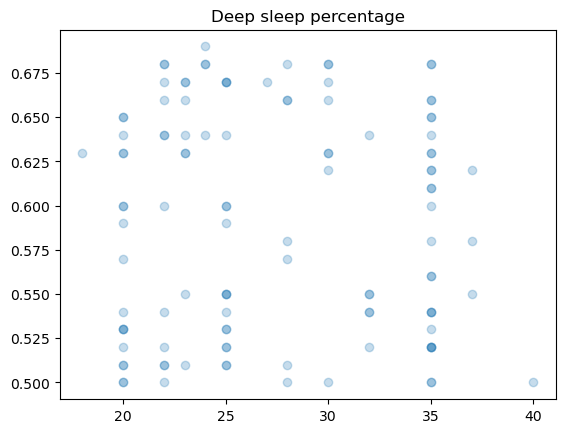

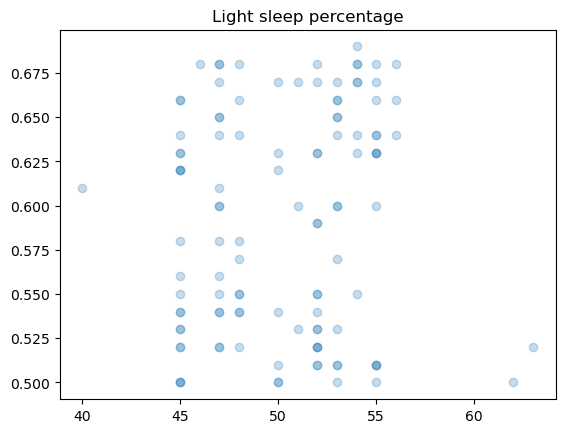

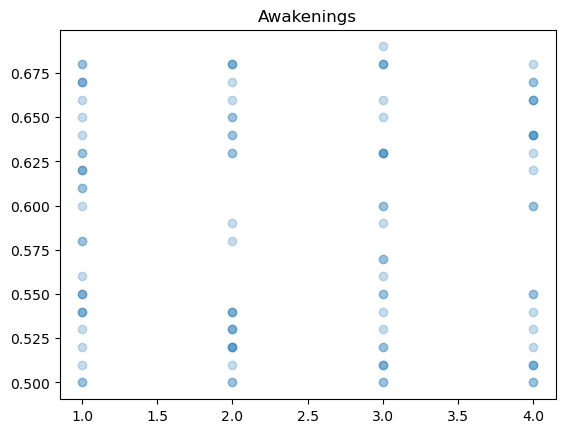

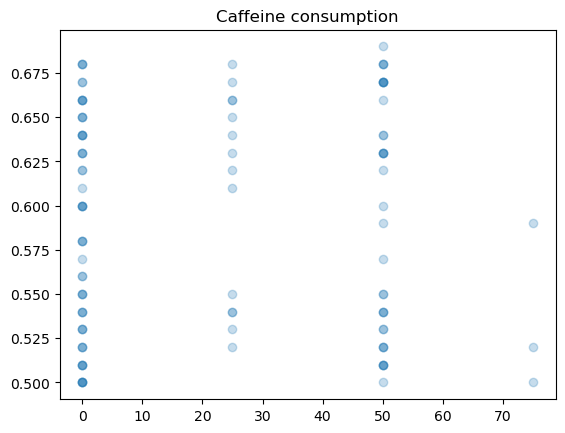

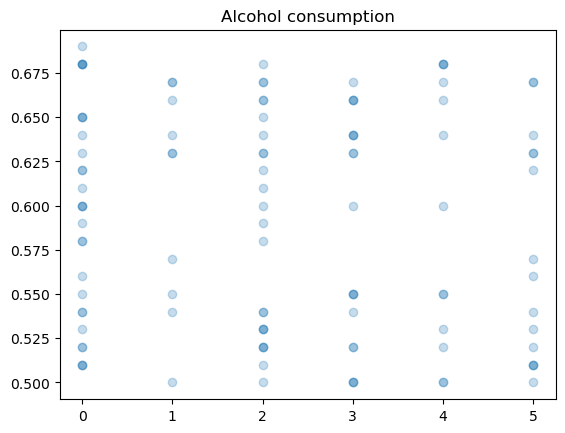

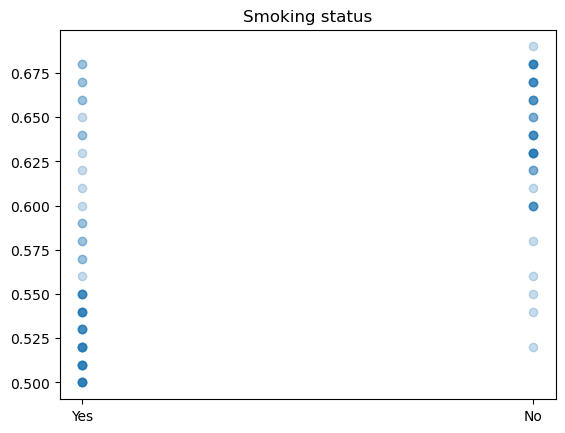

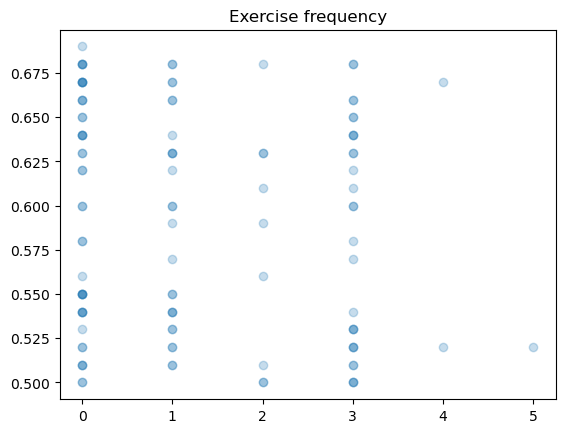

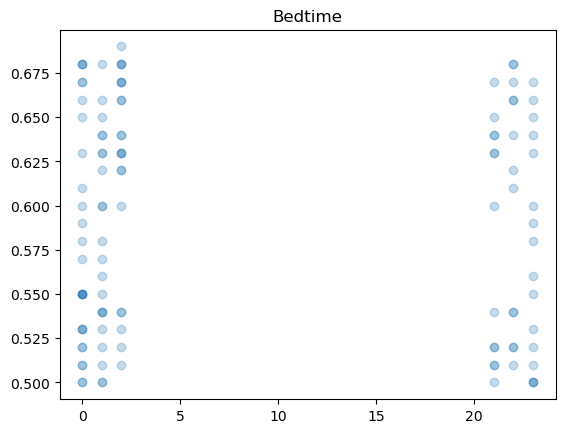

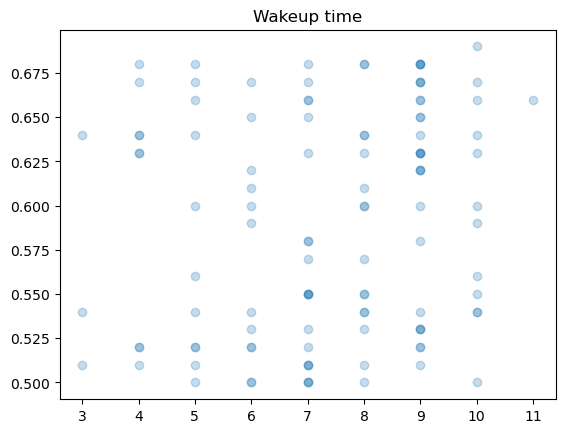

In [89]:
for col in ['Age', 'Gender', 'Sleep duration',
       'REM sleep percentage', 'Deep sleep percentage',
       'Light sleep percentage', 'Awakenings', 'Caffeine consumption',
       'Alcohol consumption', 'Smoking status', 'Exercise frequency',
        'Bedtime', 'Wakeup time']:
    if 'time' in col:
        plt.scatter(low_eff_df[col].dt.hour, low_eff_df['Sleep efficiency'], alpha=0.25)
    else:
        plt.scatter(low_eff_df[col], low_eff_df['Sleep efficiency'], alpha=0.25)
    plt.title(col)
    plt.show()

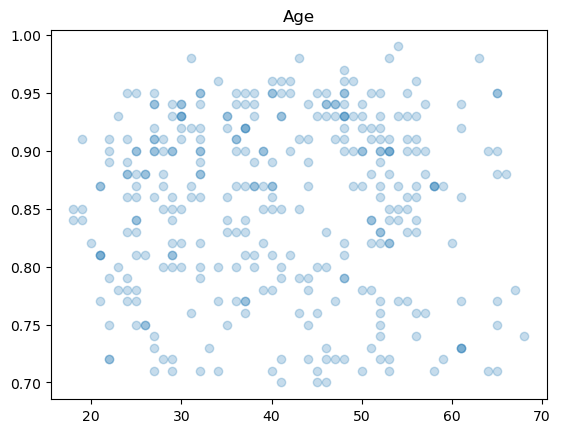

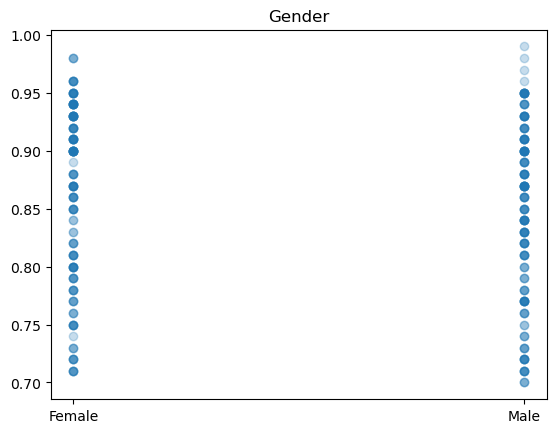

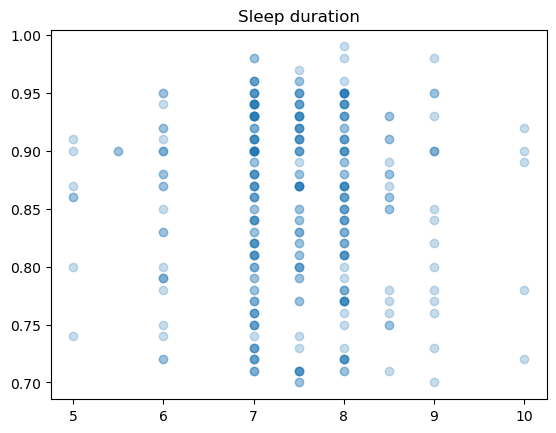

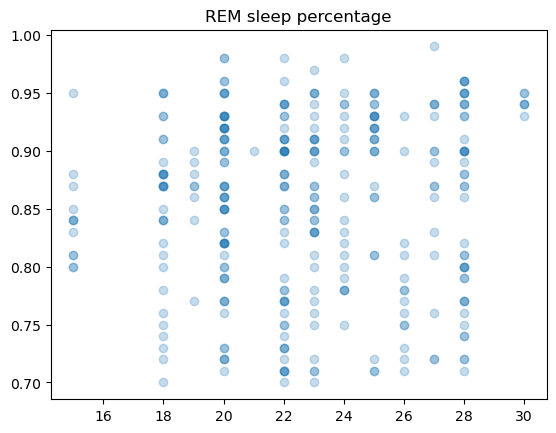

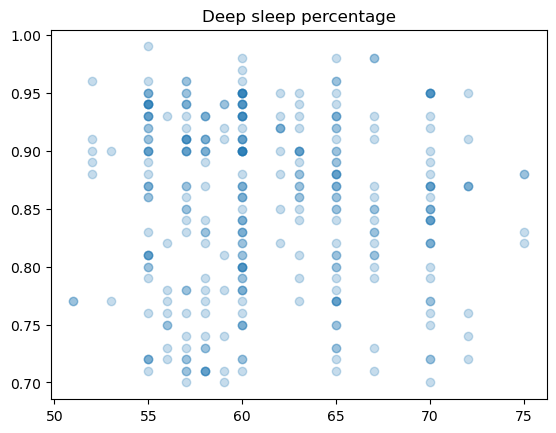

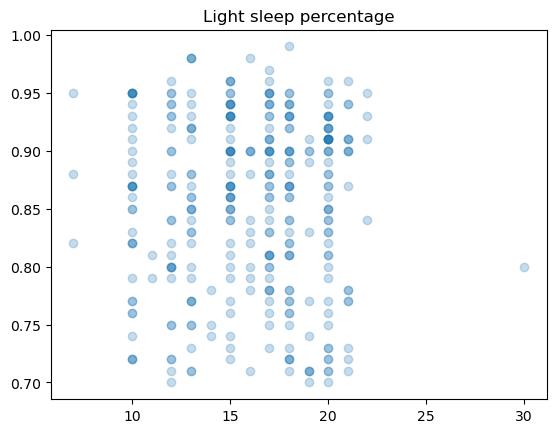

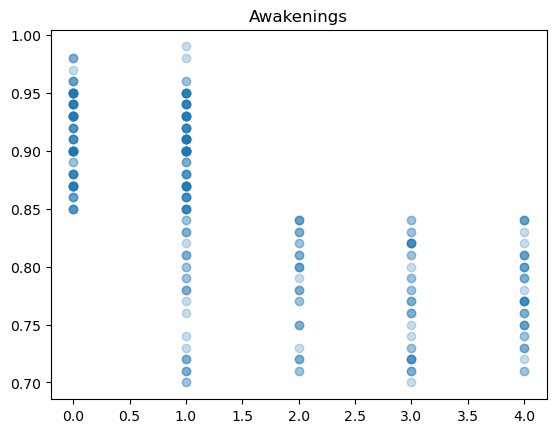

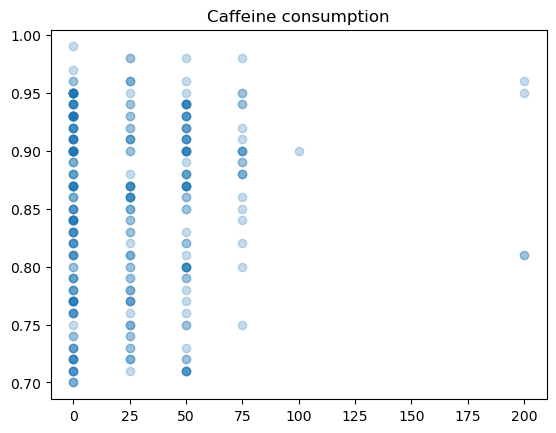

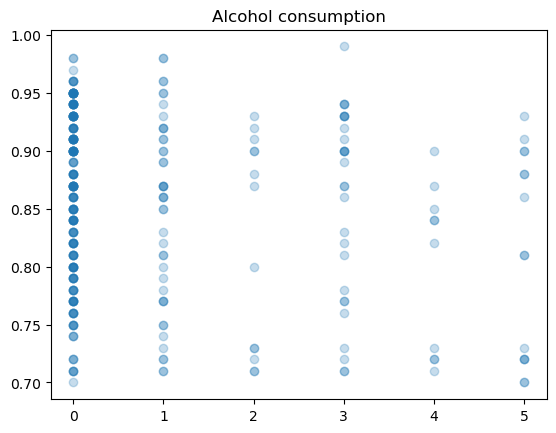

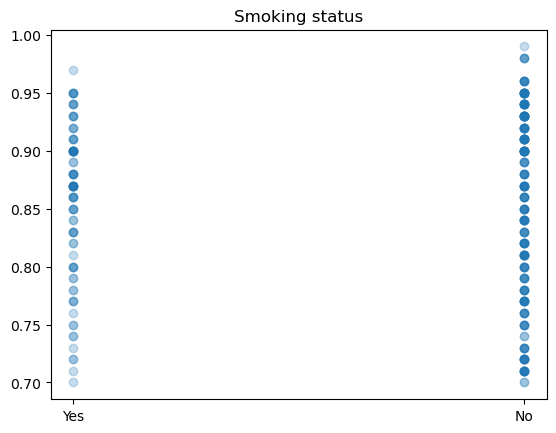

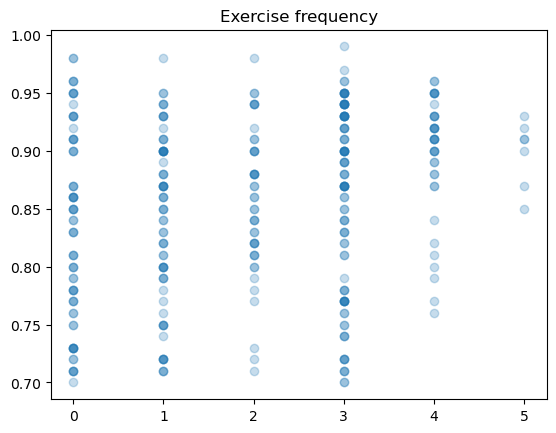

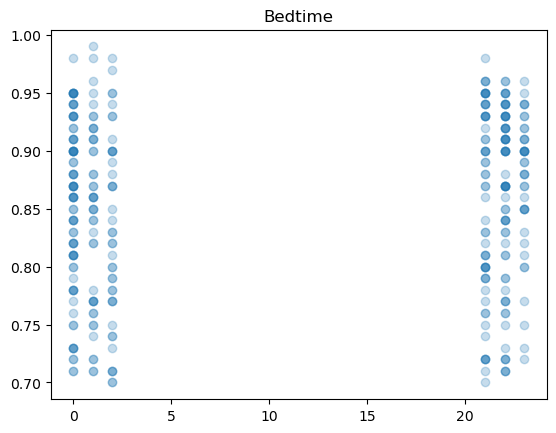

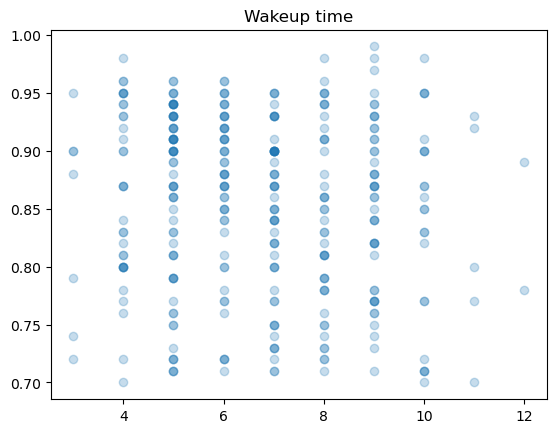

In [90]:
for col in ['Age', 'Gender', 'Sleep duration',
            'REM sleep percentage', 'Deep sleep percentage',
            'Light sleep percentage', 'Awakenings', 'Caffeine consumption',
            'Alcohol consumption', 'Smoking status', 'Exercise frequency',
            'Bedtime', 'Wakeup time']:
    if 'time' in col:
        plt.scatter(high_eff_df[col].dt.hour, high_eff_df['Sleep efficiency'], alpha=0.25)
    else:
        plt.scatter(high_eff_df[col], high_eff_df['Sleep efficiency'], alpha=0.25)
    plt.title(col)
    plt.show()

In [91]:
low_eff_df

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0
3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0
6,7,27,Female,2021-07-21 21:00:00,2021-07-21 03:00:00,6.0,0.54,28,25,47,2.0,50.0,0.0,Yes,1.0
9,10,11,Female,2021-09-16 01:00:00,2021-09-16 10:00:00,9.0,0.55,18,37,45,4.0,0.0,0.0,No,0.0
13,14,28,Male,2021-02-25 01:00:00,2021-02-25 09:30:00,8.5,0.64,28,25,47,4.0,0.0,0.0,No,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
444,445,24,Male,2021-05-07 00:00:00,2021-05-07 07:30:00,7.5,0.58,24,28,48,1.0,0.0,2.0,Yes,0.0
445,446,30,Female,2021-11-16 23:00:00,2021-11-16 06:30:00,7.5,0.53,28,20,52,4.0,50.0,2.0,Yes,1.0
446,447,23,Male,2021-04-21 00:00:00,2021-04-21 07:00:00,7.0,0.50,15,40,45,2.0,0.0,4.0,Yes,NaN
449,450,40,Female,2021-09-07 23:00:00,2021-09-07 07:30:00,8.5,0.55,20,32,48,1.0,NaN,3.0,Yes,0.0


In [92]:
low_eff_df.describe()

,ID,Age,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Exercise frequency
count,113.000000,113.000000,113,113,113.000000,113.000000,113.000000,113.000000,113.000000,107.000000,105.000000,110.000000,112.000000
mean,235.371681,38.707965,2021-07-20 04:15:39.823008512,2021-07-20 02:51:46.194690048,7.522124,0.590885,22.300885,27.415929,50.283186,2.420561,22.142857,2.200000,1.285714
min,2.000000,9.000000,2021-01-06 21:30:00,2021-01-06 05:00:00,5.000000,0.500000,15.000000,18.000000,40.000000,1.000000,0.000000,0.000000,0.000000
25%,125.000000,27.000000,2021-04-21 00:00:00,2021-04-21 07:00:00,7.000000,0.530000,20.000000,22.000000,47.000000,1.000000,0.000000,0.000000,0.000000
50%,250.000000,38.000000,2021-07-30 02:00:00,2021-07-30 09:00:00,7.500000,0.600000,22.000000,25.000000,51.000000,2.000000,0.000000,2.000000,1.000000
75%,359.000000,53.000000,2021-10-11 21:30:00,2021-10-11 05:30:00,8.000000,0.650000,24.000000,35.000000,53.000000,3.000000,50.000000,3.750000,3.000000
max,452.000000,69.000000,2021-12-16 00:30:00,2021-12-16 09:00:00,10.000000,0.690000,30.000000,40.000000,63.000000,4.000000,75.000000,5.000000,5.000000
std,139.210542,15.492326,NaN,NaN,0.929164,0.062529,3.489487,5.902066,4.063050,1.124658,24.345837,1.733639,1.324941


In [93]:
high_eff_df.describe()

,ID,Age,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Exercise frequency
count,339.000000,339.000000,339,339,339.000000,339.000000,339.000000,339.000000,339.000000,325.000000,322.000000,328.000000,334.000000
mean,223.542773,40.811209,2021-07-10 14:39:38.761061888,2021-07-10 10:08:35.044248064,7.446903,0.854926,22.719764,61.292035,15.988201,1.384615,24.145963,0.829268,1.961078
min,1.000000,18.000000,2021-01-03 00:30:00,2021-01-03 08:30:00,5.000000,0.700000,15.000000,51.000000,7.000000,0.000000,0.000000,0.000000,0.000000
25%,110.500000,30.000000,2021-04-14 00:00:00,2021-04-14 07:15:00,7.000000,0.800000,20.000000,57.000000,13.000000,0.000000,0.000000,0.000000,1.000000
50%,225.000000,40.000000,2021-07-16 00:00:00,2021-07-16 03:00:00,7.500000,0.870000,22.000000,60.000000,17.000000,1.000000,25.000000,0.000000,2.000000
75%,335.500000,51.000000,2021-10-10 11:15:00,2021-10-10 08:00:00,8.000000,0.920000,25.000000,65.000000,18.500000,2.000000,50.000000,1.000000,3.000000
max,451.000000,68.000000,2021-12-31 21:00:00,2021-12-31 06:30:00,10.000000,0.990000,30.000000,75.000000,30.000000,4.000000,200.000000,5.000000,5.000000
std,127.713647,12.283139,NaN,NaN,0.845357,0.075012,3.536947,5.262373,3.540114,1.329767,31.899381,1.427599,1.423203


In [94]:
low_eff_df.corr(numeric_only=True)

,ID,Age,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Exercise frequency
ID,1.000000,0.140038,0.014639,0.043165,-0.054362,0.002331,0.043301,-0.089487,0.080335,0.171656,0.020323
Age,0.140038,1.000000,-0.009781,0.288203,0.039957,-0.201864,0.258916,0.100855,0.093609,0.199394,0.053931
Sleep duration,0.014639,-0.009781,1.000000,0.101086,-0.047509,0.037382,-0.013500,-0.032595,-0.099109,-0.248379,-0.137574
Sleep efficiency,0.043165,0.288203,0.101086,1.000000,-0.046243,-0.028587,0.081241,-0.008004,0.006707,-0.102032,-0.131629
REM sleep percentage,-0.054362,0.039957,-0.047509,-0.046243,1.000000,-0.740526,0.216868,0.025806,0.114833,-0.088729,0.061923
Deep sleep percentage,0.002331,-0.201864,0.037382,-0.028587,-0.740526,1.000000,-0.816631,-0.109710,-0.223842,-0.021082,-0.000837
Light sleep percentage,0.043301,0.258916,-0.013500,0.081241,0.216868,-0.816631,1.000000,0.137691,0.225663,0.106258,-0.051325
Awakenings,-0.089487,0.100855,-0.032595,-0.008004,0.025806,-0.109710,0.137691,1.000000,0.004167,0.085904,-0.101337
Caffeine consumption,0.080335,0.093609,-0.099109,0.006707,0.114833,-0.223842,0.225663,0.004167,1.000000,0.108511,-0.225907
Alcohol consumption,0.171656,0.199394,-0.248379,-0.102032,-0.088729,-0.021082,0.106258,0.085904,0.108511,1.000000,0.093864


In [95]:
high_eff_df.corr(numeric_only=True)

,ID,Age,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Exercise frequency
ID,1.000000,-0.028632,0.012175,0.005705,0.092373,-0.043470,-0.027673,-0.065027,-0.098101,0.077270,0.035971
Age,-0.028632,1.000000,-0.083312,0.002200,0.038481,-0.089268,0.094250,-0.026073,-0.265502,0.023591,0.062916
Sleep duration,0.012175,-0.083312,1.000000,-0.019891,-0.002023,-0.023439,0.036863,0.002710,0.009722,0.022348,-0.034438
Sleep efficiency,0.005705,0.002200,-0.019891,1.000000,0.057629,-0.038582,-0.000226,-0.695680,0.090801,-0.181524,0.240750
REM sleep percentage,0.092373,0.038481,-0.002023,0.057629,1.000000,-0.743313,0.105827,-0.018977,0.045216,-0.008729,0.010164
Deep sleep percentage,-0.043470,-0.089268,-0.023439,-0.038582,-0.743313,1.000000,-0.743851,0.037998,-0.030971,-0.068821,-0.055175
Light sleep percentage,-0.027673,0.094250,0.036863,-0.000226,0.105827,-0.743851,1.000000,-0.037132,0.000945,0.109752,0.071355
Awakenings,-0.065027,-0.026073,0.002710,-0.695680,-0.018977,0.037998,-0.037132,1.000000,-0.123251,0.097841,-0.184276
Caffeine consumption,-0.098101,-0.265502,0.009722,0.090801,0.045216,-0.030971,0.000945,-0.123251,1.000000,-0.201133,-0.036776
Alcohol consumption,0.077270,0.023591,0.022348,-0.181524,-0.008729,-0.068821,0.109752,0.097841,-0.201133,1.000000,0.084460


In [96]:
target = seDF['Sleep efficiency'] >= 0.7

In [97]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(seDF[['Deep sleep percentage', 'Light sleep percentage']],
                                                    target,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=target)

In [98]:
from sklearn.svm import SVC

svc = SVC(kernel='linear')
svc.fit(X_train, y_train)

SVC(kernel='linear')

In [99]:
svc.score(X_train, y_train), svc.score(X_test, y_test)

(1.0, 1.0)

In [100]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

In [101]:
X_train, X_test, y_train, y_test = train_test_split(seDF[['Deep sleep percentage', 'Light sleep percentage']],
                                                    seDF['Sleep efficiency'],
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=target)

In [102]:
models = []

models.append(LinearRegression())
models.append(KNeighborsRegressor())
models.append(SVR())
models.append(RandomForestRegressor())

In [103]:
for model in models:
    print(f'model : {model}')
    model.fit(X_train, y_train)
    print(f'train score = {model.score(X_train, y_train)}')
    print(f'test score = {model.score(X_test, y_test)}')
    print()

model : LinearRegression()
train score = 0.6785753035093312
test score = 0.6494050844185397

model : KNeighborsRegressor()
train score = 0.7627768620165597
test score = 0.7009995171414777

model : SVR()
train score = 0.7052008642302522
test score = 0.7016492786966793

model : RandomForestRegressor()
train score = 0.7964431413198183
test score = 0.6720871374992516


In [104]:
for k in range(1, 51):
    model = models[1]
    model.n_neighbors = k
    print('k : ', k)
    model.fit(X_train, y_train)
    print(f'train score = {model.score(X_train, y_train)}')
    print(f'test score = {model.score(X_test, y_test)}')
    print()

k :  1
train score = 0.5596665402228838
test score = 0.4292008691453403

k :  2
train score = 0.6700993158821835
test score = 0.578494688556253

k :  3
train score = 0.7225797080948811
test score = 0.6302577928000428

k :  4
train score = 0.7522421669381125
test score = 0.6886958293095122

k :  5
train score = 0.7627768620165597
test score = 0.7009995171414777

k :  6
train score = 0.7645275616165155
test score = 0.7040127555126348

k :  7
train score = 0.7590110888105149
test score = 0.7061350131554311

k :  8
train score = 0.7556933098631705
test score = 0.7072707930951232

k :  9
train score = 0.7494132506710675
test score = 0.7087364605874181

k :  10
train score = 0.7495787078040166
test score = 0.6978657653307581

k :  11
train score = 0.7493252450453473
test score = 0.7025940676241367

k :  12
train score = 0.7470127165356794
test score = 0.7024958588175332

k :  13
train score = 0.7434822854733483
test score = 0.6978437795536558

k :  14
train score = 0.7411304527726201
test sc

In [105]:
X_train, X_test, y_train, y_test = train_test_split(pd.DataFrame(seDF['Deep sleep percentage']-seDF['Light sleep percentage']),
                                                    seDF['Sleep efficiency'],
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=target)

In [106]:
models2 = []

models2.append(LinearRegression())
models2.append(KNeighborsRegressor())
models2.append(SVR())
models2.append(RandomForestRegressor())

In [107]:
for model in models2:
    print(f'model : {model}')
    model.fit(X_train, y_train)
    print(f'train score = {model.score(X_train, y_train)}')
    print(f'test score = {model.score(X_test, y_test)}')
    print()

model : LinearRegression()
train score = 0.6546853999294666
test score = 0.645770851352836

model : KNeighborsRegressor()
train score = 0.674163266333278
test score = 0.6070497344278127

model : SVR()
train score = 0.7071984813245888
test score = 0.7093479177791664

model : RandomForestRegressor()
train score = 0.7516275945190508
test score = 0.6986729187737075
